# Model Evaluation

## Agenda

1. Null accuracy, handling missing values
2. Confusion matrix, sensitivity, specificity, setting a threshold
3. Handling categorical features, interpreting logistic regression coefficients
4. Cross-Validation

## Part 1: Null Accuracy, Handling Missing Values

### Recap of the Titanic exercise

In [4]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')

# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# TASK 4: fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.668161434978


### Null accuracy

Null accuracy is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [9]:
# compute null accuracy manually
print y_test.mean()
print 1 - y_test.mean()

0.42600896861
0.57399103139


In [10]:
# equivalent function in scikit-learn
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print metrics.accuracy_score(y_test, y_dumb_class)

0.57399103139


### Handling missing values

scikit-learn models expect that all values are **numeric** and **hold meaning**. Thus, missing values are not allowed by scikit-learn.

One possible strategy is to just **drop missing values**:

In [11]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
# drop rows with any missing values
titanic.dropna().shape

(183, 11)

In [13]:
# drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

Sometimes a better strategy is to **impute missing values**:

In [14]:
# fill missing values for Age with the mean age
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [16]:
# equivalent function in scikit-learn, supports mean/median/most_frequent
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=1)
titanic['Age'] = imp.fit_transform(titanic.Age).T

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [17]:
# include Age as a feature
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.67264573991


## Part 2: Confusion Matrix

In [19]:
metrics.confusion_matrix?


In [18]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[107,  21],
       [ 52,  43]])

In [20]:
# calculate the sensitivity
43 / float(52 + 43)

0.45263157894736844

In [21]:
# calculate the specificity
107 / float(107 + 21)

0.8359375

In [32]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

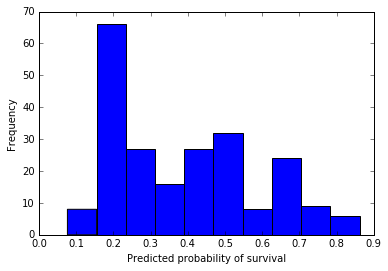

In [28]:
# plot the predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [29]:
# change the threshold for predicting survived to increase sensitivity
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [30]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.25)

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [81]:
check1

array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1

In [80]:
y_pred_class

array([[ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
         1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
         1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
         1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
         1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
         1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
         1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,
         0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.

In [53]:

check1 = np.reshape(y_pred_class,223)
#print np.reshape(y_pred_class,223).shape

In [42]:
print y_test.shape
print y_pred_class.shape

(223L,)
(1L, 223L)


In [54]:
# new confusion matrix
print metrics.confusion_matrix(y_test, check1 )

[[57 71]
 [27 68]]


In [55]:
# new sensitivity
print 68 / float(27 + 68)

0.715789473684


In [56]:
# new specificity
print 57 / float(57 + 71)

0.4453125


## Part 3: Handling Categorical Features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding

**Pclass** is an ordered categorical feature, and is already encoded as 1/2/3, so we leave it as-is.

**Sex** is an unordered categorical feature, and needs to be dummy encoded.

### Dummy encoding with two levels

In [57]:
# encode Sex_Female feature
titanic['Sex_Female'] = titanic.Sex.map({'male':0, 'female':1})

In [58]:
# include Sex_Female in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Logistic regression coefficients

In [59]:
zip(feature_cols, logreg.coef_[0])

[('Pclass', -1.220932091967994),
 ('Parch', -0.11739489104090838),
 ('Age', -0.040484280706099898),
 ('Sex_Female', 2.6815252122851363)]

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4$$

In [60]:
# convert log-odds to odds
zip(feature_cols, np.exp(logreg.coef_[0]))

[('Pclass', 0.2949551134641889),
 ('Parch', 0.88923397329186071),
 ('Age', 0.96032426001204996),
 ('Sex_Female', 14.607355632434441)]

Predict probability of survival for **Adam**: first class, no parents or kids, 29 years old, male.

In [61]:
logreg.predict_proba([1, 0, 29, 0])[:, 1]

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.50359582])

### Interpreting the Pclass coefficient

Predict probability of survival for **Bill**: same as Adam, except second class.

In [62]:
logreg.predict_proba([2, 0, 29, 0])[:, 1]

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.23031231])

How could we have calculated that change ourselves using the coefficients?

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

In [67]:
# convert Adam's probability to odds
adamodds = 0.5/(1 - 0.5)
print adamodds

1.0


In [68]:
# adjust odds for Bill due to lower class
billodds = adamodds * 0.295

In [69]:
# convert Bill's odds to probability
billodds/(1 + billodds)

0.2277992277992278

### Interpreting the Sex_Female coefficient

Predict probability of survival for **Susan**: same as Adam, except female.

In [70]:
logreg.predict_proba([1, 0, 29, 1])[:, 1]

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.9367848])

Let's calculate that change ourselves:

In [71]:
# adjust odds for Susan due to her sex
susanodds = adamodds * 14.6

# convert Susan's odds to probability
susanodds/(1 + susanodds)

0.9358974358974359

How do we interpret the **Sex_Female coefficient**? For a given Pclass/Parch/Age, being female is associated with an increase in the **log-odds of survival** by 2.68 (or an increase in the **odds of survival** by 14.6) as compared to a male, which is called the **baseline level**.

What if we had reversed the encoding for Sex?

In [72]:
# encode Sex_Male feature
titanic['Sex_Male'] = titanic.Sex.map({'male':1, 'female':0})

In [73]:
# include Sex_Male in the model instead of Sex_Female
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Male']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', -1.2201766813924484),
 ('Parch', -0.1167812931888659),
 ('Age', -0.04043299037178285),
 ('Sex_Male', -2.6803869087622512)]

The coefficient is the same, except that it's **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

### Dummy encoding with more than two levels

How do we include an unordered categorical feature with more than two levels, like **Embarked**? We can't simply encode it as C=1, Q=2, S=3, because that would imply an **ordered relationship** in which Q is somehow "double" C and S is somehow "triple" C.

Instead, we create **additional dummy variables**:

In [75]:
titanic.Embarked.head()


PassengerId
1    S
2    C
3    S
4    S
5    S
Name: Embarked, dtype: object

In [74]:
# create 3 dummy variables
pd.get_dummies(titanic.Embarked, prefix='Embarked').head(10)

Embarked_C  Embarked_Q  Embarked_S
PassengerId                                    
1                     0           0           1
2                     1           0           0
3                     0           0           1
4                     0           0           1
5                     0           0           1
6                     0           1           0
7                     0           0           1
8                     0           0           1
9                     0           0           1
10                    1           0           0

However, we actually only need **two dummy variables, not three**. Why? Because two dummies captures all of the "information" about the Embarked feature, and implicitly defines C as the **baseline level**.

In [78]:
# create 3 dummy variables, then exclude the first
pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:].head(10)

Embarked_Q  Embarked_S
PassengerId                        
1                     0           1
2                     0           0
3                     0           1
4                     0           1
5                     0           1
6                     1           0
7                     0           1
8                     0           1
9                     0           1
10                    0           0

Here is how we interpret the encoding:

- C is encoded as Embarked_Q=0 and Embarked_S=0
- Q is encoded as Embarked_Q=1 and Embarked_S=0
- S is encoded as Embarked_Q=0 and Embarked_S=1

If this is confusing, think about why we only needed one dummy variable for Sex (Sex_Female), not two dummy variables (Sex_Female and Sex_Male). In general, if you have a categorical feature with **k levels**, you create **k-1 dummy variables**.

In [83]:
# create a DataFrame with the two dummy variable columns
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [84]:
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male   22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3                                       Heikkinen, Miss. Laina  female   26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5                                     Allen, Mr. William Henry    male   35   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN        S   
2                1      0          PC 17599  71.2833   C85        C   
3                0      0  STON/O2. 3101282   7.9250   NaN        S   
4                1      0            113803  53.1000  C123        S   
5                0      0            373450   8.0500   NaN        S   

             Sex_Female  Sex_Male  Embarked_Q  Embarked_S  
PassengerId                                                
1                     0         1           0           1  
2                     1         0           0           0  
3                     1         0           0           1  
4                     1         0           0           1  
5                     0         1           0           1

In [85]:
# include Embarked_Q and Embarked_S in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', -1.1884985998346915),
 ('Parch', -0.09362239042482598),
 ('Age', -0.040727318327547543),
 ('Sex_Female', 2.6425066172546092),
 ('Embarked_Q', -0.18494080723338657),
 ('Embarked_S', -0.61019904879175724)]

## Part 4: Cross Validation

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.77777778  0.8         0.7752809   0.86516854  0.7752809   0.7752809
  0.78651685  0.7752809   0.80898876  0.81818182]
0.795775734877


### Task: Evaluate each stage of the model with Cross-Validation

### Task: Evaluate the Cross-Validation score with different values of n (2, 5, 10, 50)